In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import sys
import os
from scipy.stats import linregress
from pprint import pprint


In [2]:
# The path to our CSV file
file = "data_files/good_merged_data.csv"

# Read our Movie data into pandas
movie_df = pd.read_csv(file)
movie_df.head()


,Title,Year,Rated,Released,Runtime,Genre,Language,Awards,imdbRating,imdbVotes,imdbID,Type,Production,Budget,Revenue,ROI%
0,Vulgar,2000,R,26 Apr 2002,87,"Crime, Drama, Thriller",English,NaN,5.3,3876,tt0120467,movie,Lions Gate Films,120000,14904,-87.58
1,Out of the Furnace,2013,R,06 Dec 2013,116,"Action, Crime, Drama, Thriller",English,2 wins & 9 nominations.,6.8,103339,tt1206543,movie,Relativity Media,22000000,15400000,-30.00
2,Coyote Ugly,2000,PG-13,04 Aug 2000,100,"Comedy, Drama, Music, Romance",English,4 wins & 8 nominations.,5.7,104644,tt0200550,movie,Buena Vista,45000000,113916474,153.15
3,Parental Guidance,2012,PG,25 Dec 2012,105,"Comedy, Family",English,1 win & 4 nominations.,6.0,24453,tt1047540,movie,20th Century Fox,25000000,119772232,379.09
4,Raising Helen,2004,PG-13,28 May 2004,119,"Comedy, Drama, Romance",English,1 nomination.,6.0,34868,tt0350028,movie,Buena Vista Pictures,50000000,49718611,-0.56


In [3]:
# Get general info 
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       586 non-null    object 
 1   Year        586 non-null    int64  
 2   Rated       580 non-null    object 
 3   Released    586 non-null    object 
 4   Runtime     586 non-null    int64  
 5   Genre       586 non-null    object 
 6   Language    586 non-null    object 
 7   Awards      512 non-null    object 
 8   imdbRating  586 non-null    float64
 9   imdbVotes   586 non-null    int64  
 10  imdbID      586 non-null    object 
 11  Type        586 non-null    object 
 12  Production  586 non-null    object 
 13  Budget      586 non-null    int64  
 14  Revenue     586 non-null    int64  
 15  ROI%        586 non-null    float64
dtypes: float64(2), int64(5), object(9)
memory usage: 73.4+ KB


In [4]:
# Extract relevant fields from the data frame
year = movie_df['Year']
roi = movie_df['ROI%']
rtime = movie_df['Runtime']
bud = movie_df['Budget']
rev =  movie_df['Revenue']

In [5]:
# Get movies with highest Budget, ROI
movie_df.nlargest(3, 'Budget')

,Title,Year,Rated,Released,Runtime,Genre,Language,Awards,imdbRating,imdbVotes,imdbID,Type,Production,Budget,Revenue,ROI%
492,The Lion King,2019,PG,19 Jul 2019,118,"Animation, Adventure, Drama, Family, Musical","English, Xhosa, Zulu, French, Spanish",Nominated for 1 Oscar. Another 16 wins & 34 no...,6.9,194149,tt6105098,movie,Walt Disney Pictures,260000000,1656943394,537.29
160,Harry Potter and the Half-Blood Prince,2009,PG,15 Jul 2009,153,"Action, Adventure, Family, Fantasy, Mystery",English,Nominated for 1 Oscar. Another 8 wins & 35 nom...,7.6,453636,tt0417741,movie,Warner Bros. Pictures,250000000,933959197,273.58
188,The Hobbit: The Desolation of Smaug,2013,PG-13,13 Dec 2013,161,"Adventure, Fantasy",English,Nominated for 3 Oscars. Another 18 wins & 87 n...,7.8,588164,tt1170358,movie,Warner Bros.,250000000,958400000,283.36


In [6]:
movie_df.nlargest(3, 'ROI%')

,Title,Year,Rated,Released,Runtime,Genre,Language,Awards,imdbRating,imdbVotes,imdbID,Type,Production,Budget,Revenue,ROI%
389,Catfish,2010,PG-13,01 Oct 2010,87,"Documentary, Drama, Mystery, Thriller",English,2 wins & 7 nominations.,7.1,39522,tt1584016,movie,Universal Pictures/Rogue,30000,3045943,10053.14
408,The Full Monty,1997,R,19 Sep 1997,91,"Comedy, Drama",English,Won 1 Oscar. Another 36 wins & 34 nominations.,7.2,96582,tt0119164,movie,Twentieth Century Fox Home Entertainment,3500000,257850122,7267.15
273,Get Out,2017,R,24 Feb 2017,104,"Horror, Mystery, Thriller",English,Won 1 Oscar. Another 152 wins & 201 nominations.,7.7,463872,tt5052448,movie,Universal Pictures,4500000,255407969,5575.73


# Plotting the Data

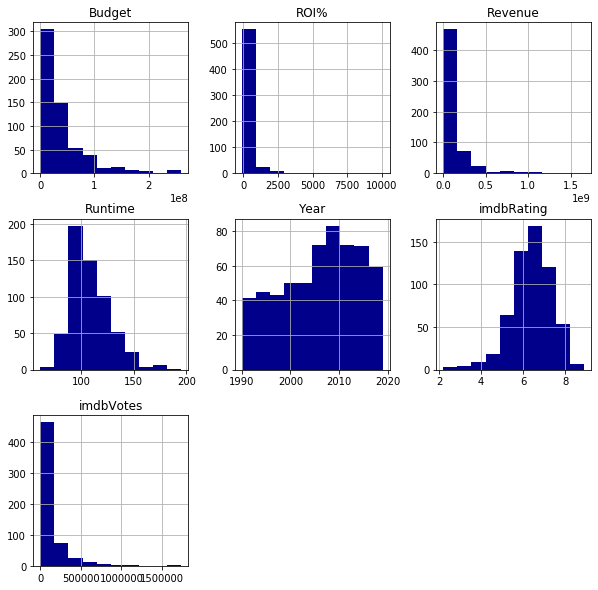

In [7]:
# Look at histograms to get idea of how variables are distrubuted (overall)
movie_df.hist(color='Darkblue',figsize= (10,10));

## Year vs. ROI Plot

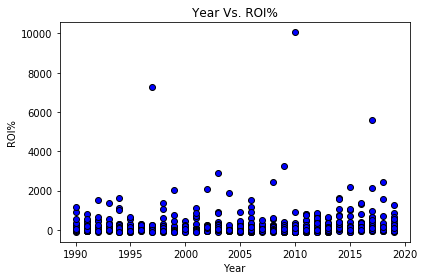

In [8]:
# Generate a scatter plot showing the year Vs. ROI
plt.scatter(year,roi,edgecolors="black",facecolors="blue")
plt.xlabel("Year")
plt.ylabel("ROI%")
plt.title("Year Vs. ROI%")
plt.savefig('figures/year_vs_ROI.png')
plt.tight_layout()
plt.show()

## Runtime vs. ROI

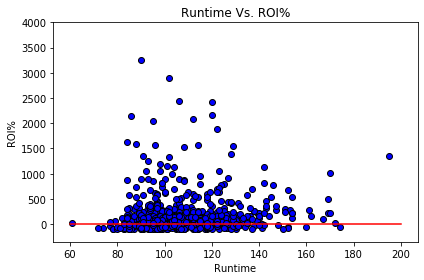

In [9]:
# Generate a scatter plot showing the Runtime Vs. ROI
x_values = [60, 200]
y_values = [0, 0]
plt.scatter(rtime,roi,edgecolors="black",facecolors="blue")
plt.xlabel("Runtime")
plt.ylabel("ROI%")
plt.title("Runtime Vs. ROI%")
plt.ylim(-350, 4000)
plt.plot(x_values, y_values, color='r')
plt.savefig('figures/runtime_vs_ROI.png')
plt.tight_layout()
plt.show()


## Budget vs. ROI

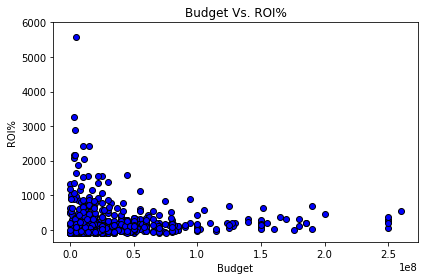

In [17]:
# Generate a scatter plot showing the Budget Vs. ROI
x_values = [60, 200]
y_values = [0, 0]
plt.scatter(bud,roi,edgecolors="black",facecolors="blue")
plt.xlabel('Budget')
plt.ylabel('ROI%')
plt.title('Budget Vs. ROI%')
plt.ylim(-350, 4000)
plt.plot(x_values, y_values, color='r')
plt.savefig('figures/budget_vs_ROI.png')
plt.tight_layout()
plt.show()

## Revenue vs. ROI

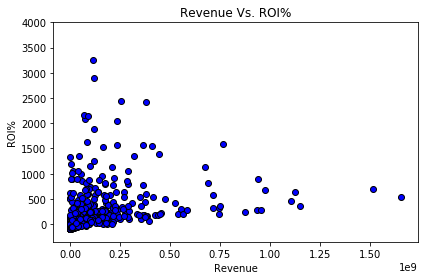

In [11]:
# Generate a scatter plot showing the Revenue Vs. ROI
x_values = [60, 200]
y_values = [0, 0]
plt.scatter(rev,roi,edgecolors="black",facecolors="blue")
plt.xlabel("Revenue")
plt.ylabel("ROI%")
plt.title("Revenue Vs. ROI%")
plt.ylim(-350, 4000)
plt.plot(x_values, y_values, color='r')
plt.savefig('figures/revenue_vs_ROI.png')
plt.tight_layout()
plt.show()

## Budget Vs. Revenue

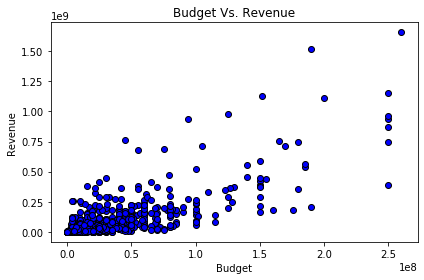

In [16]:
# Generate a scatter plot showing the Revenue Vs. ROI
x_values = [60, 200]
y_values = [0, 0]
plt.scatter(bud,rev,edgecolors="black",facecolors="blue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget Vs. Revenue")
plt.plot(x_values, y_values, color='r')
plt.savefig('figures/Budget_Vs_revenue.png')
plt.tight_layout()
plt.show()